# Pretrained models

## Alex net: investigating the filters

Torch vision models: https://pytorch.org/vision/stable/models.html

In [ ]:
# ! pip install --upgrade torch torchvision

In [4]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from PIL import Image
import numpy as np

# import model from torch vision
from torchvision.models import alexnet, AlexNet_Weights

In [2]:
# load model
net = alexnet(weights=AlexNet_Weights)
net

C:\Users\EricEckstein\miniconda3\envs\deepl\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\EricEckstein/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
10.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

23.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [5]:
# number of parameters in the conv part
n_param_conv = torch.nn.utils.parameters_to_vector(net.features.parameters())
len(n_param_conv)

2469696

In [6]:
# number of parameters in the fully connected part
n_param_fully = torch.nn.utils.parameters_to_vector(net.classifier.parameters())
len(n_param_fully)

58631144

In [7]:
# ratio conv/fully 
len(n_param_conv)/len(n_param_fully)

0.04212259614105432

In [8]:
# print dimension of conv weight shape
net.features[0].weight.shape

torch.Size([64, 3, 11, 11])

In [9]:
net.features[0].bias.shape

torch.Size([64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


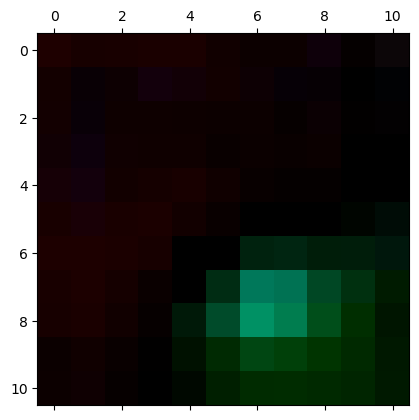

In [10]:
# visualize first filter
plt.matshow(
    net.features[0].weight[0].data.permute(1,2,0).numpy()
)

In [11]:
grid = make_grid(net.features[0].weight.data, nrow=16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


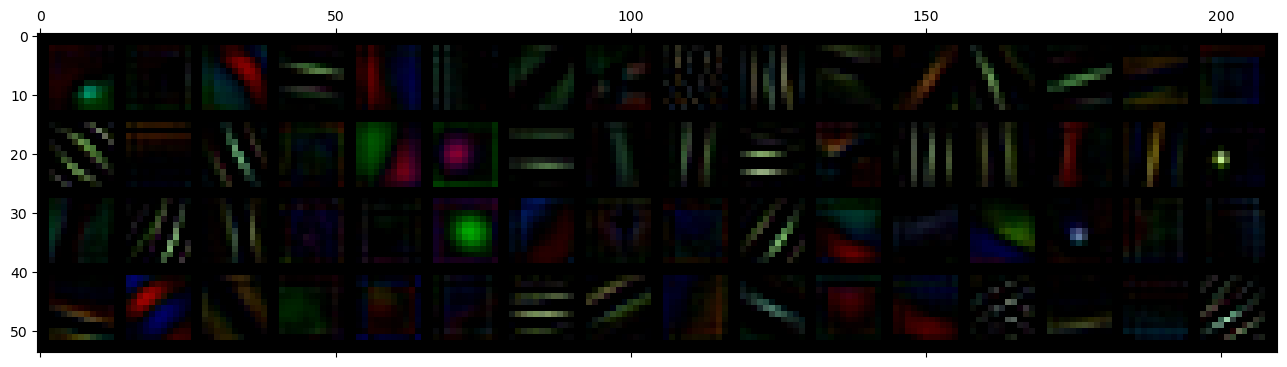

In [12]:
plt.matshow(grid.permute(1,2,0))

In [13]:
# img_path = '/home/hubert/Lecture/Resources/dalle2.jpg'
img_path = '/home/hubert/Lecture/Resources/football_1.jpeg'
img = Image.open(img_path)
img.show()
img_np = np.array(img)
img_np.shape

FileNotFoundError: [Errno 2] No such file or directory: '/home/hubert/Lecture/Resources/football_1.jpeg'

In [14]:
img_torch = torch.tensor(img_np).permute(2,0,1)[None].float()
img_torch.shape

NameError: name 'img_np' is not defined

In [ ]:
out = net(img_torch)
out.shape

In [ ]:
out.argmax(-1)

In [ ]:
out.topk(5)

In [ ]:
img.thumbnail((256,256))
img.show()

In [ ]:
img_torch2 = torch.tensor(img_np).permute(2,0,1)[None].float()
img_torch2.shape
out = net(img_torch)
out.topk(5)

## Mobilenet v3

In [ ]:
# import model from torch vision
from torchvision.models import mobilenet_v3_small, MobileNet_V3_Small_Weights

In [ ]:
# load model
mob_net = mobilenet_v3_small(weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1)
mob_net

In [ ]:
n_param_mob = torch.nn.utils.parameters_to_vector(mob_net.parameters())
len(n_param_mob)

In [ ]:
grid = make_grid(mob_net.features[0][0].weight.data, nrow=16)
plt.matshow(grid.permute(1,2,0))

In [ ]:
out = mob_net(img_torch)
out.shape

In [ ]:
out.argmax(-1)

In [ ]:
out.topk(5)

## Pytorch Hub 
https://pytorch.org/hub/research-models

In [ ]:
AlexNe